### 데이터 분석용

In [1]:
import pandas as pd
import numpy as np
import os

In [12]:
def load_csv():
    csv_file_path = "JEJU_MCT_DATA_v2.csv"
    df = pd.read_csv(os.path.join('./lowdata', csv_file_path),encoding='cp949')
    return df
df = load_csv()
# 최신연월 데이터만 가져옴
# df = df[df['YM'] == df['YM'].max()].reset_index(drop=True)

In [13]:
for month in range(202301, 202313):
    month_df = df[df['YM'] == month]
    print(f"{str(month)[-2:]}월 : {len(month_df)}")

01월 : 5808
02월 : 5738
03월 : 5473
04월 : 5647
05월 : 5606
06월 : 5651
07월 : 5628
08월 : 6030
09월 : 5447
10월 : 5813
11월 : 5614
12월 : 5409


In [49]:
# 총 가게가 9252가 아닐까
print(len(df['ADDR'].unique()))
duplication = [[index, value] for index, value in df['ADDR'].value_counts().items() if value > 1]
counter = 0
for target in duplication:
    counter += 1
    filtered = df[df['ADDR'] == target[0]]
    if filtered.iloc[0]['MCT_NM'] != filtered.iloc[1]['MCT_NM']:
        print("주소는 같은데 업장이 다름", target[1])
        print(filtered.iloc[0]['ADDR'], filtered.iloc[0]['MCT_NM'], filtered.iloc[1]['MCT_NM'])
        
print("같은곳", counter)
# 매월 겹친다
# 그냥 이름 유니크 걸어서 찾고, 


8843
주소는 같은데 업장이 다름 68
제주 제주시 용담이동 2002번지 4층 풀입채진고복식당제주공항점 벨아벨카페
주소는 같은데 업장이 다름 60
제주 서귀포시 안덕면 서광리 2489번지 1층 (주) 신세계푸드 제주신화월드  고래라면 (주)신세계푸드 제주신화월드
주소는 같은데 업장이 다름 46
제주 제주시 연동 273-34번지 1층 마라양꼬치 종승호
주소는 같은데 업장이 다름 46
제주 제주시 건입동 1435-2번지 거제도횟집 해진횟집
주소는 같은데 업장이 다름 45
제주 제주시 노형동 1279-1번지 고향숯불막창구이 라원양꼬치
주소는 같은데 업장이 다름 39
제주 제주시 이도일동 1329-6번지 야시장이동식판매대(27호) 야시장이동식판매대 (12호)
주소는 같은데 업장이 다름 39
제주 제주시 용담이동 2002번지 3층 커피베이 제주공항국내선1호점 띠아모제주공항3층
주소는 같은데 업장이 다름 36
제주 서귀포시 안덕면 동광리 810번지 1층 제주일품순두부동광점 청춘당꽈배기서부점
주소는 같은데 업장이 다름 36
제주 제주시 용담이동 2002번지 (주)아워홈 제주국제공항2지점 주식회사리치모어
주소는 같은데 업장이 다름 35
제주 서귀포시 안덕면 서광리 산 24번지 지하1층 하겐다즈 제주신화월드점 리치망고신화월드점
주소는 같은데 업장이 다름 34
제주 제주시 일도일동 1102-3번지 1층 복마니 김밥 동문야시장
주소는 같은데 업장이 다름 33
제주 제주시 우도면 연평리 317-2번지 호로락 지미스
주소는 같은데 업장이 다름 32
제주 제주시 연동 273-34번지 영건식당 노랑통닭
주소는 같은데 업장이 다름 30
제주 제주시 화북일동 1015-2번지 1층 은희네해장국삼화점 춘천명동닭갈비 삼화점
주소는 같은데 업장이 다름 30
제주 서귀포시 서귀동  삿뽀로우동집별관 버들간이식당
주소는 같은데 업장이 다름 30
제주 서귀포시 동홍동 413-5번지 1층 60계치킨제주서귀포동홍점 노랑통닭 동홍점
주소는 같은데 업장이 다름 29
제주 제주시 아라일동 6140-16번지 1층

In [51]:
# 1. 주소와 가맹점 이름이 모두 동일한 경우를 하나의 가맹점으로 간주하여 중복 제거
unique_shops = df.drop_duplicates(subset=['ADDR', 'MCT_NM'])

# 2. 중복된 행을 제거한 데이터프레임에서 실제 가맹점 수 계산
actual_shop_count = unique_shops.shape[0]

print(f"실제 가맹점의 개수: {actual_shop_count}개")

# 3. 주소는 같은데 이름이 다른 경우 출력
addr_duplications = unique_shops['ADDR'].value_counts()
for addr, count in addr_duplications.items():
    if count > 1:
        # 주소가 같은데 이름이 다른 경우 찾기
        filtered_shops = unique_shops[unique_shops['ADDR'] == addr]
        print(f"주소는 같지만 업장이 다른 경우 ({addr}):")
        print(filtered_shops[['ADDR', 'MCT_NM']])

# 4. 이름은 같은데 주소가 다른 경우 출력
name_duplications = unique_shops['MCT_NM'].value_counts()
for name, count in name_duplications.items():
    if count > 1:
        # 이름이 같은데 주소가 다른 경우 찾기
        filtered_shops = unique_shops[unique_shops['MCT_NM'] == name]
        print(f"이름은 같지만 주소가 다른 경우 ({name}):")
        print(filtered_shops[['ADDR', 'MCT_NM']])

실제 가맹점의 개수: 9390개
주소는 같지만 업장이 다른 경우 (제주 제주시 연동 273-34번지 1층):
                        ADDR  MCT_NM
307    제주 제주시 연동 273-34번지 1층   마라양꼬치
871    제주 제주시 연동 273-34번지 1층     종승호
1531   제주 제주시 연동 273-34번지 1층     산방산
2564   제주 제주시 연동 273-34번지 1층  오늘와인한잔
60970  제주 제주시 연동 273-34번지 1층     막갈비
64437  제주 제주시 연동 273-34번지 1층    한라오름
주소는 같지만 업장이 다른 경우 (제주 제주시 용담이동 2002번지 4층):
                       ADDR                       MCT_NM
692   제주 제주시 용담이동 2002번지 4층                풀입채진고복식당제주공항점
724   제주 제주시 용담이동 2002번지 4층                        벨아벨카페
1135  제주 제주시 용담이동 2002번지 4층              1950에어차이나 제주공항점
3590  제주 제주시 용담이동 2002번지 4층  (주)신세계푸드 한국공항공사 제주지역본부 직원식당
4363  제주 제주시 용담이동 2002번지 4층                    퀴즈노스제주공항점
4647  제주 제주시 용담이동 2002번지 4층                      제주향토음식점
주소는 같지만 업장이 다른 경우 (제주 서귀포시 안덕면 서광리 2489번지 1층):
                           ADDR                   MCT_NM
3471  제주 서귀포시 안덕면 서광리 2489번지 1층   (주) 신세계푸드 제주신화월드  고래라면
3836  제주 서귀포시 안덕면 서광리 2489번지 1층          (주)신세계푸드 제주신화월드
4263  제주 서귀포시 안덕면 서광

In [14]:
df = load_csv()
# 1. ADDR와 MCT_NM을 기준으로 그룹화하고, 각 그룹에서 YM이 가장 큰 행의 인덱스를 가져옴
latest_entries = df.loc[df.groupby(['ADDR', 'MCT_NM'])['YM'].idxmax()]

# 2. 최신 데이터만 저장한 결과를 새로운 데이터프레임으로 저장
latest_df = latest_entries.copy()

# 3. 최신 데이터가 저장된 결과 확인
print(f"각 가맹점별 최신 데이터가 저장된 개수: {latest_df.shape[0]}개")
print(latest_df.head())  # 결과 일부 미리보기

# 5. 필요에 따라 CSV로 저장
latest_df.to_csv('./data/latest_mct_data.csv', index=False)
print("최신 가맹점 데이터가 'latest_mct_data.csv' 파일로 저장되었습니다.")

각 가맹점별 최신 데이터가 저장된 개수: 9390개
           YM      MCT_NM    OP_YMD MCT_TYPE  \
65415  202312         돈삼춘  20170728      가정식   
35698  202307     풍류라운지 청  20220331  단품요리 전문   
56975  202311          아지  20180222  단품요리 전문   
32416  202306         한스옥  20201014       양식   
62971  202312  7번가피자 신서귀점  20160617       피자   

                                           ADDR           UE_CNT_GRP  \
65415                                            6_90% 초과(하위 10% 이하)   
35698                     제주 서귀포시 강정동 1339번지 1층  6_90% 초과(하위 10% 이하)   
56975                 제주 서귀포시 강정동 141-7번지 지하 1층             5_75~90%   
32416     제주 서귀포시 강정동 1416-3번지 강정지예타운 102동 101호             5_75~90%   
62971  제주 서귀포시 강정동 1416-3번지 강정지예타운 102동 1층 102호             5_75~90%   

                UE_AMT_GRP UE_AMT_PER_TRSN_GRP  MON_UE_CNT_RAT  \
65415             4_50~75%            2_10~25%        0.250000   
35698             4_50~75%            2_10~25%        0.047619   
56975             5_75~90%            3_25~50%     

In [26]:
# 상위 구간 체크
df['UE_CNT_GRP'].value_counts()

UE_CNT_GRP
4_50~75%               1372
3_25~50%               1330
2_10~25%                806
5_75~90%                798
6_90% 초과(하위 10% 이하)     564
1_상위 10% 이하             539
Name: count, dtype: int64

In [27]:
print(df['MCT_NM'].count())
print(len(df['MCT_NM'].unique()))
duplication = [[index, value] for index, value in df['MCT_NM'].value_counts().items() if value > 1]
for target in duplication:
    filtered = df[df['MCT_NM'] == target[0]]
    if filtered.iloc[0]['ADDR'] == filtered.iloc[1]['ADDR']:
        print("중복됨")
    else:
        print(filtered.iloc[0]['ADDR'])


5409
5381
제주 제주시 외도일동 532-8번지
제주 제주시 조천읍 함덕리 1002-27번지 1층
제주 제주시 아라일동 368-15번지 1층 아라일동
제주 제주시 일도이동 168-11번지
제주 서귀포시 동홍동 640-1번지
제주 제주시 우도면 연평리 1290-6번지
제주 제주시 이도이동 2042-2번지 1층
제주 제주시 한림읍 협재리 1732번지
제주 제주시 노형동 1051-5번지 노형위더스빌15차 102호
제주 서귀포시 강정동 208-5번지 1층 101호
제주 제주시 노형동 726-1번지
제주 서귀포시 서귀동 644-5번지
제주 서귀포시 대정읍 보성리 2476-13번지 에이동 106호
제주 제주시 연동 293-9번지
제주 서귀포시 성산읍 고성리 350-1번지
제주 제주시 화북이동 827-1번지 1층
제주 제주시 도련일동 1777-5번지 1층
제주 제주시 삼도이동 14-5번지 1층
제주 서귀포시 서귀동 256-44번지 서귀동
제주 제주시 한경면 조수리 1363-1번지 1층
제주 제주시 연동 262-13번지
제주 서귀포시 서귀동 275-12번지 1층
제주 제주시 삼도일동 804-5번지 1층
제주 서귀포시 서귀동 323-3번지 휴마루유니크아파트 상가 102호
제주 제주시 한림읍 한림리 1252-8번지
제주 제주시 아라일동 2417-3번지 1층
제주 제주시 연동 
제주 서귀포시 서귀동 255-7번지 서귀동


In [17]:
csv_file_path = "latest_mct_data_v2.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path),encoding='cp949')

In [10]:
# 2차 데이터에서 중복확인
name_duplications = df['MCT_NM'].value_counts()
counter = 0
for name, count in name_duplications.items():
    if count > 1:
        counter += 1
        # 이름이 같은데 주소가 다른 경우 찾기
        filtered_shops = df[df['MCT_NM'] == name]
        print(f"이름은 같지만 주소가 다른 경우 ({name}):")
        print(filtered_shops[['YM', 'OP_YMD', 'ADDR', 'MCT_NM']])
print(counter)

이름은 같지만 주소가 다른 경우 (한라원):
          YM    OP_YMD                                ADDR MCT_NM
2242  202312  20230322         제주 서귀포시 안덕면 서광리 산 24번지 F004    한라원
2260  202303  20230202     제주 서귀포시 안덕면 서광리 산 35-16번지 F004동    한라원
2261  202301  20180615  제주 서귀포시 안덕면 서광리 산 35-16번지 F004동 1층    한라원
이름은 같지만 주소가 다른 경우 (시(see)):
          YM    OP_YMD                  ADDR  MCT_NM
1379  202312  20200526     제주 서귀포시 서귀동 418번지  시(see)
1382  202307  20211022  제주 서귀포시 서귀동 418번지 5층  시(see)
이름은 같지만 주소가 다른 경우 (고집순두부연동본점):
          YM    OP_YMD                   ADDR     MCT_NM
5831  202308  20230317     제주 제주시 연동 251-27번지  고집순두부연동본점
5832  202302  20220211  제주 제주시 연동 251-27번지 1층  고집순두부연동본점
이름은 같지만 주소가 다른 경우 (쭈꾸쭈꾸쭈꾸미):
          YM    OP_YMD                 ADDR   MCT_NM
1357  202312  20111006  제주 서귀포시 서귀동 416-2번지  쭈꾸쭈꾸쭈꾸미
6321  202312  20130814    제주 제주시 연동 293-9번지  쭈꾸쭈꾸쭈꾸미
이름은 같지만 주소가 다른 경우 (신창흑돼지두루치기):
          YM    OP_YMD                      ADDR     MCT_NM
522   202312  20190509  제주 서귀포시 대정읍 하모리 143

In [21]:
# 2차 데이터에서 중복확인. 주소 같은 친구들
name_duplications = df['ADDR'].value_counts()
duplication = [[index, value] for index, value in df['ADDR'].value_counts().items() if value > 1]
print(duplication)
# counter = 0
# for name, count in name_duplications.items():
#     if count > 1:
#         counter += 1
#         # 이름이 같은데 주소가 다른 경우 찾기
#         filtered_shops = df[df['MCT_NM'] == name]
#         print(f"이름은 같지만 주소가 다른 경우 ({name}):")
#         print(filtered_shops[['YM', 'OP_YMD', 'ADDR', 'MCT_NM']])
# print(counter)

[['제주 제주시 용담이동 2002번지 4층', 6], ['제주 제주시 연동 273-34번지 1층', 6], ['제주 서귀포시 안덕면 서광리 2489번지 1층', 5], ['제주 서귀포시 안덕면 서광리 산 35-16번지 1층', 4], ['제주 서귀포시 안덕면 서광리 산 24번지 지하1층', 4], ['제주 제주시 아라일동 6140-16번지 1층', 4], ['제주 제주시 용담이동 2002번지 3층', 4], ['제주 제주시 우도면 연평리 317-2번지', 4], ['제주 서귀포시 서귀동 ', 4], ['제주 제주시 연동 273-34번지', 4], ['제주 제주시 애월읍 유수암리 1206번지', 4], ['제주 제주시 화북일동 1015-2번지 1층', 4], ['제주 제주시 이도일동 1329-6번지', 4], ['제주 제주시 노형동 1279-1번지', 4], ['제주 제주시 건입동 1435-2번지', 4], ['제주 제주시 연동 2326-4번지 1층', 3], ['제주 제주시 아라일동 6106번지 1층', 3], ['제주 제주시 외도일동 476-1번지 1층', 3], ['제주 제주시 조천읍 함덕리 1004-17번지 1층', 3], ['제주 서귀포시 서귀동 432-8번지', 3], ['제주 제주시 연동 2326-12번지 1층', 3], ['제주 제주시 영평동 2169-3번지 1층', 3], ['제주 제주시 일도이동 380-2번지 1층', 3], ['제주 서귀포시 표선면 성읍리 987-1번지', 3], ['제주 서귀포시 서호동 1525-2번지 1층', 3], ['제주 서귀포시 중문동 2025-1번지', 3], ['제주 제주시 노형동 937-11번지 1층', 3], ['제주 제주시 연동 261-10번지', 3], ['제주 제주시 애월읍 봉성리 4554번지', 3], ['제주 제주시 외도일동 637-12번지 1층', 3], ['제주 서귀포시 서귀동 423-9번지 1층', 3], ['제주 서귀포시 성산읍 성산리 234-12번지', 3], ['제주 제주시 오라일동 244

In [8]:
csv_file_path = "latest_mct_data_v3.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path))

print(df.shape)
filtered_df = df[~df['MCT_NM'].str.endswith('x', na=False)]

# 2. 결과 확인
print(f"필터링된 데이터프레임의 크기: {filtered_df.shape}")
print(filtered_df.head())  # 필터링 후 일부 데이터 확인

filtered_df.to_csv('./data/latest_mct_data_v3_modified.csv', index=False)

(9383, 28)
필터링된 데이터프레임의 크기: (9297, 28)
       YM        MCT_NM    OP_YMD MCT_TYPE                     ADDR  \
0  202312  24시전주명가콩나물국밥  20230131  단품요리 전문   제주 서귀포시 서귀동 423-9번지 1층   
1  202312  24시전주명가콩나물국밥  20190711  단품요리 전문  제주 제주시 아라일동 2417-3번지 1층   
2  202312       30년할매닭발  20180223  단품요리 전문      제주 제주시 외도일동 495-6번지   
4  202312          고기다   20190607  단품요리 전문  제주 서귀포시 성산읍 고성리 350-1번지   
5  202312           고기다  20230927  단품요리 전문   제주 제주시 외도일동 482-2번지 1층   

            UE_CNT_GRP UE_AMT_GRP UE_AMT_PER_TRSN_GRP  MON_UE_CNT_RAT  \
0          1_상위 10% 이하   2_10~25%            5_75~90%        0.119122   
1          1_상위 10% 이하   2_10~25%            5_75~90%        0.114114   
2             4_50~75%   4_50~75%            4_50~75%        0.113636   
4             5_75~90%   5_75~90%            3_25~50%        0.166667   
5  6_90% 초과(하위 10% 이하)   4_50~75%         1_상위 10% 이하        0.176471   

   TUE_UE_CNT_RAT  ...  HR_18_22_UE_CNT_RAT  HR_23_4_UE_CNT_RAT  \
0        0.100313  ...      

In [11]:
csv_file_path = "latest_mct_data_v4.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path))

name_duplications = df['ADDR'].value_counts()
duplication = [[index, value] for index, value in df['ADDR'].value_counts().items() if value > 1]
print(duplication)

[['제주 제주시 연동 273-34번지 1층', 6], ['제주 제주시 용담이동 2002번지 4층', 6], ['제주 서귀포시 안덕면 서광리 2489번지 1층', 5], ['제주 서귀포시 안덕면 서광리 산 35-16번지 1층', 4], ['제주 서귀포시 서귀동 ', 4], ['제주 제주시 연동 273-34번지', 4], ['제주 제주시 용담이동 2002번지 3층', 4], ['제주 제주시 아라일동 6140-16번지 1층', 4], ['제주 제주시 애월읍 유수암리 1206번지', 4], ['제주 서귀포시 안덕면 서광리 산 24번지 지하1층', 4], ['제주 제주시 건입동 1435-2번지', 4], ['제주 제주시 노형동 1279-1번지', 4], ['제주 제주시 화북일동 1015-2번지 1층', 4], ['제주 제주시 우도면 연평리 317-2번지', 4], ['제주 제주시 이도일동 1329-6번지', 4], ['제주 제주시 애월읍 하귀2리 2837-7번지 1층', 3], ['제주 제주시 연동 2326-4번지 1층', 3], ['제주 제주시 오라일동 2449-10번지 1층', 3], ['제주 제주시 연동 1320번지', 3], ['제주 제주시 외도일동 476-1번지 1층', 3], ['제주 제주시 연동 261-10번지', 3], ['제주 서귀포시 성산읍 성산리 234-12번지', 3], ['제주 제주시 외도일동 637-12번지 1층', 3], ['제주 제주시 연동 2326-12번지 1층', 3], ['제주 서귀포시 서호동 1477-3번지 1층', 3], ['제주 서귀포시 중문동 2025-1번지', 3], ['제주 제주시 아라일동 6106번지 1층', 3], ['제주 제주시 연동 291-10번지', 3], ['제주 제주시 일도일동 1102-3번지 1층', 3], ['제주 제주시 노형동 937-11번지 1층', 3], ['제주 제주시 아라일동 362-80번지 1층', 3], ['제주 제주시 애월읍 봉성리 4554번지', 3], ['제주 제주시 삼양이동 2332-7번

In [17]:
import re
# 동 중복된거 날리기
def remove_duplicate_dong_eup_ri(address):
    # 정규식 패턴: "(동|읍|리)\s.*\1$"
    # - "(동|읍|리)" : "동", "읍", "리" 단어를 캡처
    # - "\s.*" : 공백 이후 어떤 문자가 와도 상관없음
    # - "\1$" : 첫 번째 캡처 그룹(동, 읍, 리)이 다시 등장하며 문자열의 끝에 위치
    pattern = r'(\b[가-힣]+(동|읍|리))\s.*\1$'
    return re.sub(pattern, r'\1', address)

In [15]:

# N층 날림
csv_file_path = "latest_mct_data_v5_modified.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path))

def remove_floor_info(address):
    # 정규표현식을 사용하여 '1층', '2층' 등의 패턴 이후의 문자열을 제거
    return re.split(r'\d+층', address)[0].strip()

# 'ADDR' 열에 대해 함수 적용
df['ADDR'] = df['ADDR'].apply(remove_floor_info)
df['ADDR'] = df['ADDR'].apply(remove_duplicate_dong_eup_ri)
df.to_csv('./data/removed_floor2.csv', index=False)


In [12]:
from geopy.geocoders import Nominatim
import time

csv_file_path = "latest_mct_data_v5_modified.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path))

geolocator = Nominatim(user_agent="geoapiExercises")

def get_latitude_longitude(addr):
    """주어진 주소를 위도와 경도로 변환하여 반환"""
    try:
        location = geolocator.geocode(addr)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error for {addr}: {e}")
        return None, None

# 4. 위도, 경도 값이 없는 경우만 변환 수행
for idx, row in df.iterrows():
    # 이미 위도와 경도 값이 있는 경우 건너뜀
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        continue

    # 주소('ADDR')를 사용하여 위도와 경도 가져오기
    latitude, longitude = get_latitude_longitude(row['ADDR'])

    # 변환된 값 저장
    df.at[idx, 'Latitude'] = latitude
    df.at[idx, 'Longitude'] = longitude

    # API 요청이 너무 빠르면 차단될 수 있으므로 1초 지연
    time.sleep(1)

# 5. 결과 확인
print("변환 완료!")

Error for 제주 제주시 한경면 신창리 409-1번지 1층: Non-successful status code 403
Error for 제주 제주시 한경면 신창리 393번지: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%EC%A0%9C%EC%A3%BC+%EC%A0%9C%EC%A3%BC%EC%8B%9C+%ED%95%9C%EA%B2%BD%EB%A9%B4+%EC%8B%A0%EC%B0%BD%EB%A6%AC+393%EB%B2%88%EC%A7%80&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error for 제주 제주시 한경면 신창리 327-2번지 1층: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%EC%A0%9C%EC%A3%BC+%EC%A0%9C%EC%A3%BC%EC%8B%9C+%ED%95%9C%EA%B2%BD%EB%A9%B4+%EC%8B%A0%EC%B0%BD%EB%A6%AC+327-2%EB%B2%88%EC%A7%80+1%EC%B8%B5&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error for 제주 제주시 한경면 신창리 327-2번지: HTTPSConnectionPool(host='nominatim.openstreet

KeyboardInterrupt: 

In [14]:
df.to_csv('./data/converted_coordinates.csv', index=False)

In [2]:
import difflib

# 예시 데이터프레임의 컬럼 이름 목록
orderby_keys = ['월요일이용비중', '화요일이용비중',
             '수요일이용비중', '목요일이용비중',
             '금요일이용비중', '토요일이용비중',
             '일요일이용비중', '5시~11시이용비중',
             '12시~13시이용비중', '14시~17시이용비중',
             '18시~22시이용비중', '23시~4시이용비중',
             '현지인이용비중', '남성회원수비중',
             '여성회원수비중', '20대이하회원수비중',
             '30대회원수비중', '40대회원수비중',
             '50대회원수비중', '60대이상회원수비중']

# 사용자 입력 (예: "이용금액")
user_input = "이용금액"

# difflib을 이용해 가장 유사한 컬럼 이름 찾기
best_match = difflib.get_close_matches(user_input, orderby_keys, n=1)

if best_match:
    selected_column = best_match[0]
    print(f"사용자 입력 '{user_input}'에 가장 유사한 컬럼: {selected_column}")
else:
    print(f"'{user_input}'에 해당하는 유사 컬럼을 찾을 수 없습니다.")


'이용금액'에 해당하는 유사 컬럼을 찾을 수 없습니다.


In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# 1. 임베딩 모델 로드
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

# 2. 예시 데이터프레임의 컬럼 이름 목록
columns = ['월요일이용비중', '화요일이용비중',
             '수요일이용비중', '목요일이용비중',
             '금요일이용비중', '토요일이용비중',
             '일요일이용비중', '5시~11시이용비중',
             '12시~13시이용비중', '14시~17시이용비중',
             '18시~22시이용비중', '23시~4시이용비중',
             '현지인이용비중', '남성회원수비중',
             '여성회원수비중', '20대이하회원수비중',
             '30대회원수비중', '40대회원수비중',
             '50대회원수비중', '60대이상회원수비중']

# 3. 사용자 입력 (예: "이용 금액")
user_input = "일요일 비중"

# 4. 컬럼명과 사용자 입력을 임베딩
column_embeddings = model.encode(columns)
user_input_embedding = model.encode([user_input])

# 5. 코사인 유사도 계산
cosine_similarities = np.dot(column_embeddings, user_input_embedding.T).flatten()

# 6. 가장 유사한 컬럼명 선택
best_match_index = np.argmax(cosine_similarities)
selected_column = columns[best_match_index]

# 7. 비교용 컬럼들(상위 4개)
top_n = 4
sorted_indices = np.argsort(cosine_similarities)[::-1][:top_n]

print(f"사용자 입력 '{user_input}'에 가장 유사한 컬럼: '{selected_column}' (유사도: {cosine_similarities[best_match_index]:.2f})")
# 7. 선택된 4개의 컬럼명과 유사도 출력
print(f"사용자 입력 '{user_input}'와 유사한 상위 {top_n} 컬럼:")
for idx in sorted_indices:
    print(f"- {columns[idx]} (유사도: {cosine_similarities[idx]:.4f})")


사용자 입력 '일요일 비중'에 가장 유사한 컬럼: '일요일이용비중' (유사도: 114.80)
사용자 입력 '일요일 비중'와 유사한 상위 4 컬럼:
- 일요일이용비중 (유사도: 114.8001)
- 토요일이용비중 (유사도: 67.2906)
- 23시~4시이용비중 (유사도: 53.2546)
- 월요일이용비중 (유사도: 52.6364)


In [6]:
csv_file_path = "final_coordinates_2.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path), encoding='cp949')

print(df['MCT_TYPE'].unique())

['중식' '가정식' '단품요리 전문' '아이스크림/빙수' '커피' '피자' '양식' '치킨' '일식' '맥주/요리주점'
 '샌드위치/토스트' '도시락' '베이커리' '분식' '꼬치구이' '차' '스테이크' '구내식당/푸드코트' '동남아/인도음식'
 '햄버거' '떡/한과' '포장마차' '주스' '민속주점' '부페' '기타세계요리' '도너츠' '기사식당' '야식'
 '패밀리 레스토랑']


In [66]:
csv_file_path = "final_coordinates.csv"
df = pd.read_csv(os.path.join('./data', csv_file_path),encoding='cp949')
df['외지인'] = 1 - df['LOCAL_UE_CNT_RAT']

In [67]:
columns_of_interest = ['MCT_TYPE','MON_UE_CNT_RAT','TUE_UE_CNT_RAT','WED_UE_CNT_RAT','THU_UE_CNT_RAT','FRI_UE_CNT_RAT','SAT_UE_CNT_RAT','SUN_UE_CNT_RAT','HR_5_11_UE_CNT_RAT','HR_12_13_UE_CNT_RAT',
'HR_14_17_UE_CNT_RAT',
'HR_18_22_UE_CNT_RAT',
'HR_23_4_UE_CNT_RAT',
'LOCAL_UE_CNT_RAT',
'RC_M12_MAL_CUS_CNT_RAT',
'RC_M12_FME_CUS_CNT_RAT',
'RC_M12_AGE_UND_20_CUS_CNT_RAT',
'RC_M12_AGE_30_CUS_CNT_RAT',
'RC_M12_AGE_40_CUS_CNT_RAT',
'RC_M12_AGE_50_CUS_CNT_RAT',
'RC_M12_AGE_OVR_60_CUS_CNT_RAT',
'외지인'
]
df_filtered = df[columns_of_interest]

grouped_df = df_filtered.groupby('MCT_TYPE').mean()

In [68]:
print(grouped_df)

           MON_UE_CNT_RAT  TUE_UE_CNT_RAT  WED_UE_CNT_RAT  THU_UE_CNT_RAT  \
MCT_TYPE                                                                    
가정식              0.131596        0.135667        0.136752        0.147600   
구내식당/푸드코트        0.138464        0.136576        0.133433        0.169528   
기사식당             0.161854        0.158696        0.154812        0.146302   
기타세계요리           0.118093        0.136835        0.135527        0.117353   
꼬치구이             0.120136        0.103708        0.116636        0.154600   
단품요리 전문          0.129959        0.127151        0.128413        0.144844   
도너츠              0.133652        0.132597        0.138556        0.132153   
도시락              0.176185        0.152804        0.155077        0.202028   
동남아/인도음식         0.154595        0.106581        0.164074        0.121885   
떡/한과             0.089887        0.131222        0.131090        0.161248   
맥주/요리주점          0.116527        0.121284        0.120866        0.145743   

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.font_manager as fm

# 한글 폰트 설정 (NanumGothic 폰트를 사용한 예시)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 설치된 한글 폰트 사용
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호가 깨지는 문제 방지

MCT_TYPE
차           0.625000
기타세계요리      0.608900
베이커리        0.579093
떡/한과        0.564565
도너츠         0.563625
스테이크        0.554833
주스          0.550667
동남아/인도음식    0.539500
Name: RC_M12_FME_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_FME_CUS_CNT_RAT', ylabel='MCT_TYPE'>

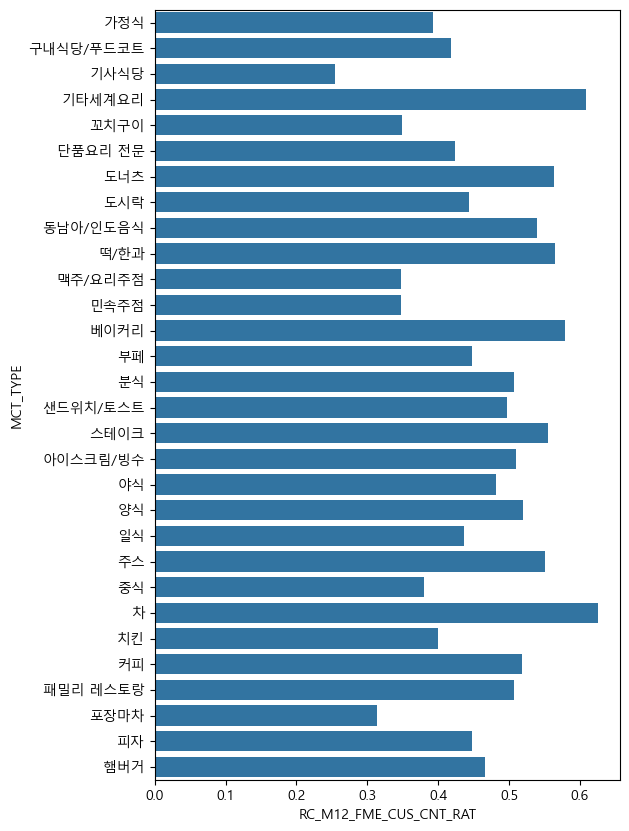

In [61]:
# 여성 이용 비중
top_5_female_usage = grouped_df.sort_values(by='RC_M12_FME_CUS_CNT_RAT', ascending=False).head(8)
print(top_5_female_usage['RC_M12_FME_CUS_CNT_RAT'])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x='RC_M12_FME_CUS_CNT_RAT', y='MCT_TYPE', data=grouped_df)

MCT_TYPE
기사식당       0.746000
포장마차       0.686833
맥주/요리주점    0.652911
민속주점       0.652333
꼬치구이       0.651281
중식         0.619532
가정식        0.606695
치킨         0.600864
Name: RC_M12_MAL_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_MAL_CUS_CNT_RAT', ylabel='MCT_TYPE'>

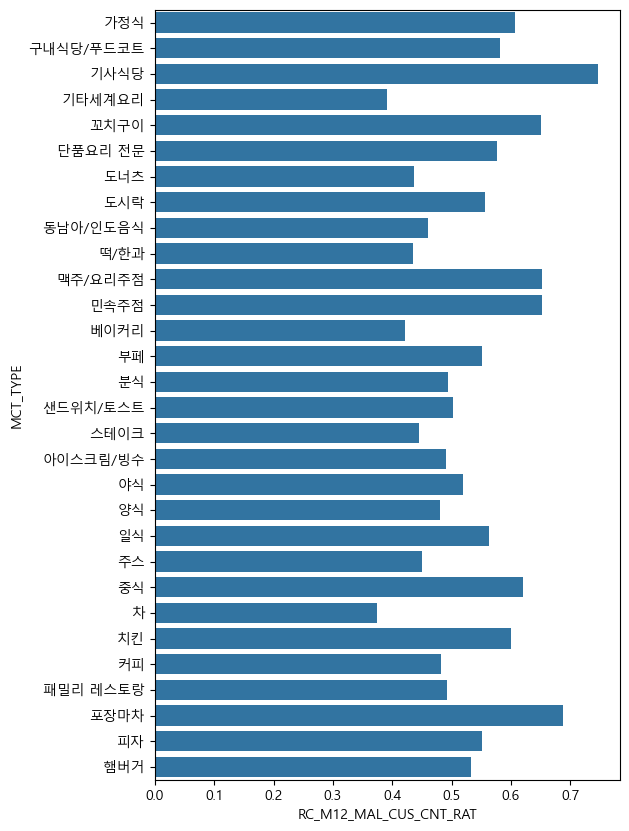

In [62]:
# 남성 이용 비중
top_5_female_usage = grouped_df.sort_values(by='RC_M12_MAL_CUS_CNT_RAT', ascending=False).head(8)
print(top_5_female_usage['RC_M12_MAL_CUS_CNT_RAT'])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x='RC_M12_MAL_CUS_CNT_RAT', y='MCT_TYPE', data=grouped_df)

MCT_TYPE
기사식당         0.355741
떡/한과         0.355632
구내식당/푸드코트    0.303419
도시락          0.288745
분식           0.269047
커피           0.241156
도너츠          0.240366
베이커리         0.217554
Name: HR_5_11_UE_CNT_RAT, dtype: float64


<Axes: xlabel='HR_5_11_UE_CNT_RAT', ylabel='MCT_TYPE'>

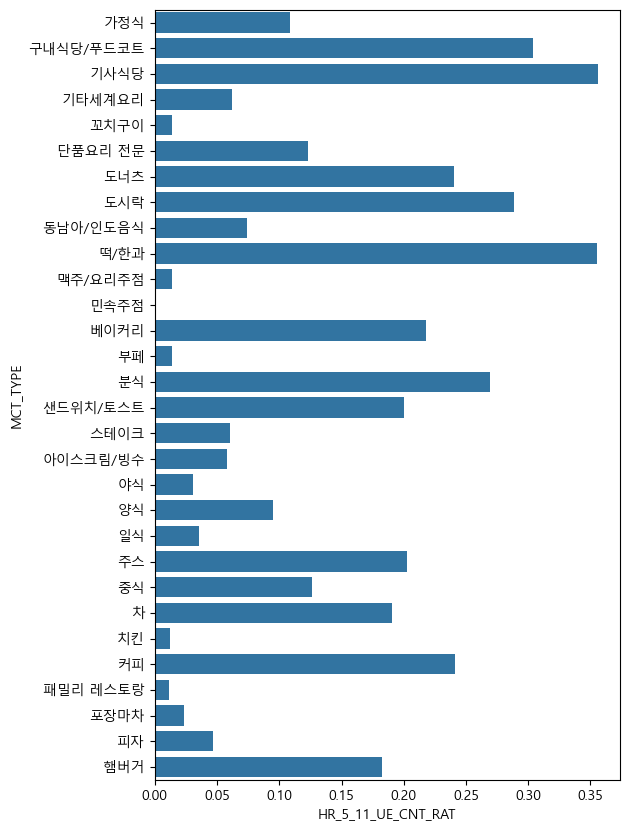

In [63]:
# 5-11 이용 비중
target_column = 'HR_5_11_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
기사식당         0.407860
도시락          0.372584
중식           0.349570
구내식당/푸드코트    0.317495
동남아/인도음식     0.308952
Name: HR_12_13_UE_CNT_RAT, dtype: float64


<Axes: xlabel='HR_12_13_UE_CNT_RAT', ylabel='MCT_TYPE'>

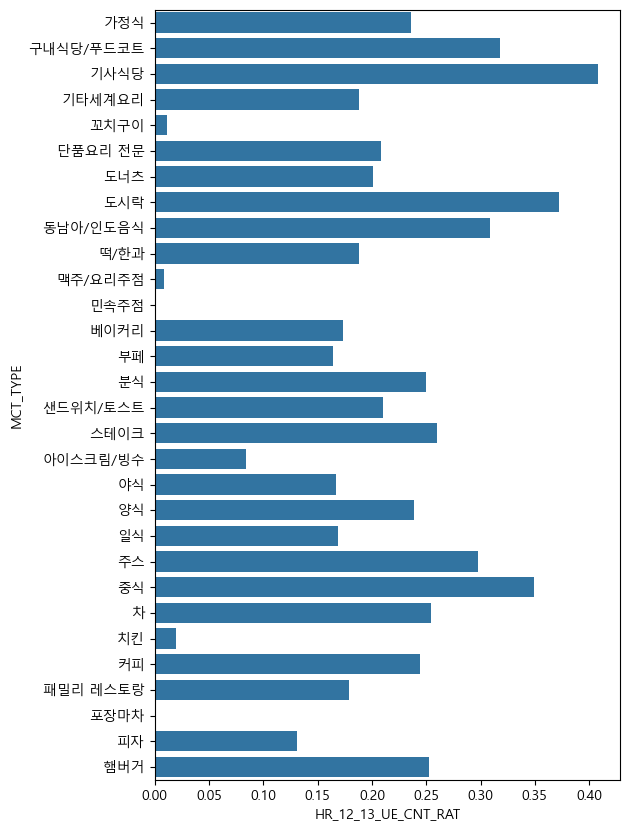

In [45]:
# 12-13 이용 비중
target_column = 'HR_12_13_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(5)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
주스      0.428367
차       0.421923
도너츠     0.388743
떡/한과    0.368962
베이커리    0.353037
Name: HR_14_17_UE_CNT_RAT, dtype: float64


<Axes: xlabel='HR_14_17_UE_CNT_RAT', ylabel='MCT_TYPE'>

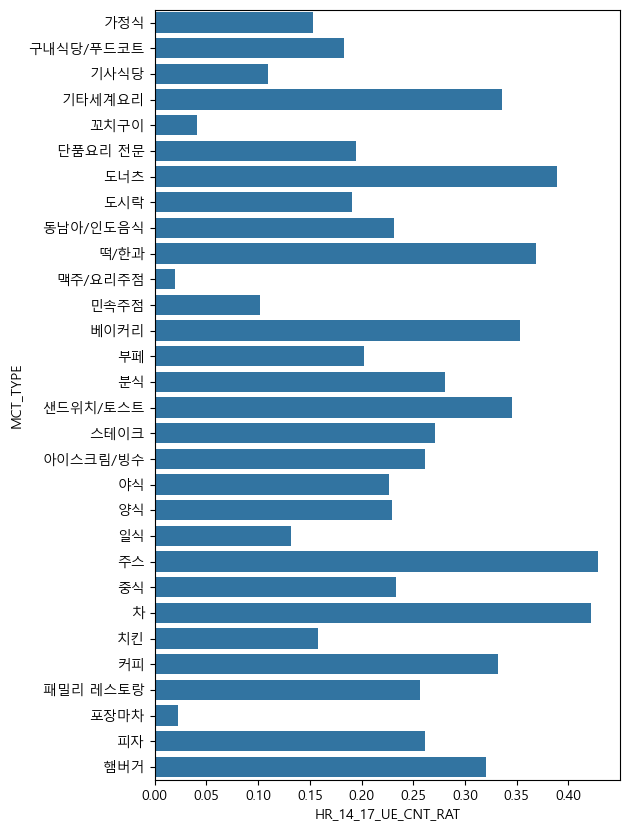

In [46]:
# 14-17 이용 비중
target_column = 'HR_14_17_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(5)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
치킨      0.712330
포장마차    0.620303
부페      0.613145
꼬치구이    0.612413
민속주점    0.596557
Name: HR_18_22_UE_CNT_RAT, dtype: float64


<Axes: xlabel='HR_18_22_UE_CNT_RAT', ylabel='MCT_TYPE'>

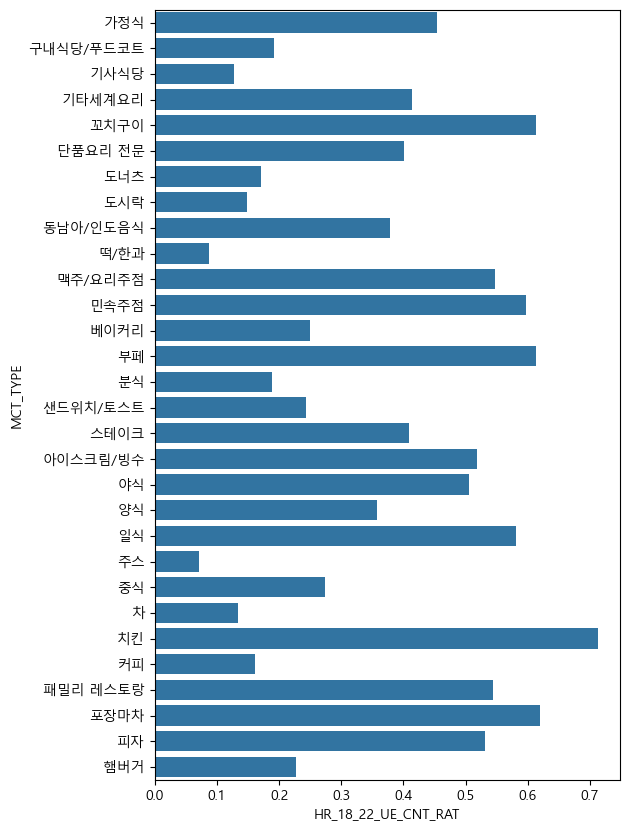

In [47]:
# 18-22 이용 비중
target_column = 'HR_18_22_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(5)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
맥주/요리주점    0.411157
포장마차       0.333250
꼬치구이       0.321905
민속주점       0.301756
치킨         0.097625
Name: HR_23_4_UE_CNT_RAT, dtype: float64


<Axes: xlabel='HR_23_4_UE_CNT_RAT', ylabel='MCT_TYPE'>

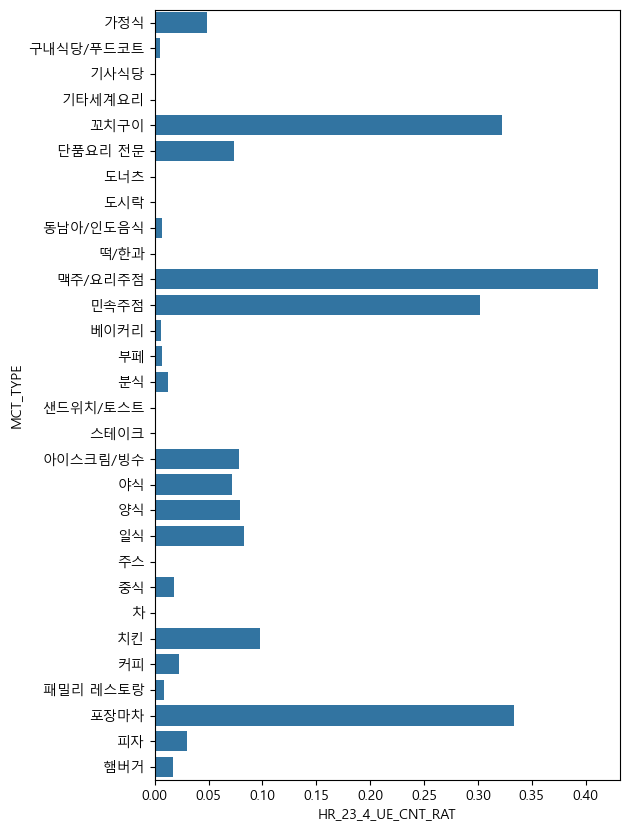

In [48]:
# 심야 이용 비중
target_column = 'HR_23_4_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(5)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
패밀리 레스토랑    0.747368
기타세계요리      0.742468
야식          0.709627
꼬치구이        0.706385
아이스크림/빙수    0.699704
민속주점        0.676071
도시락         0.666958
부페          0.660273
Name: LOCAL_UE_CNT_RAT, dtype: float64


<Axes: xlabel='LOCAL_UE_CNT_RAT', ylabel='MCT_TYPE'>

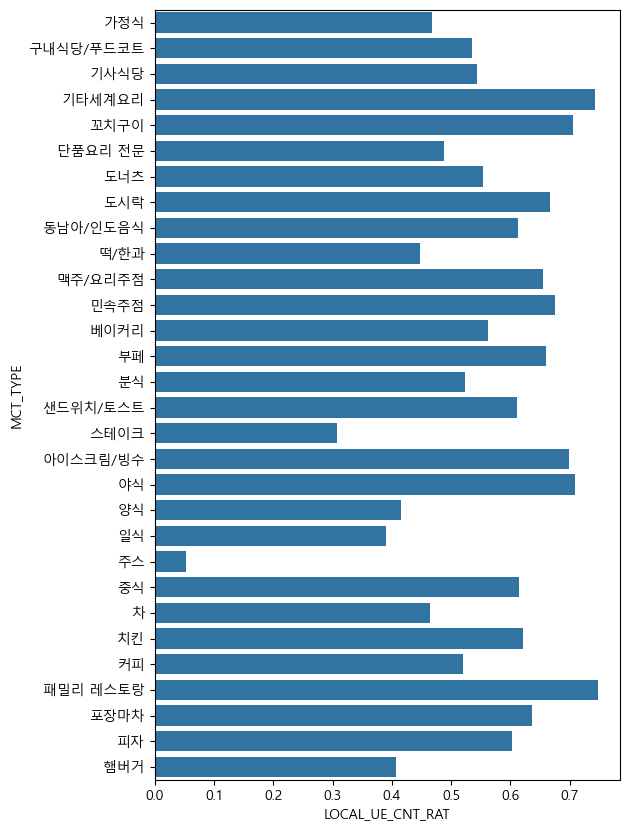

In [64]:
# 현지인 이용 비중
target_column = 'LOCAL_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
주스      0.947298
스테이크    0.693278
일식      0.610196
햄버거     0.592849
양식      0.584364
떡/한과    0.551696
차       0.535818
가정식     0.532630
Name: 외지인, dtype: float64


<Axes: xlabel='외지인', ylabel='MCT_TYPE'>

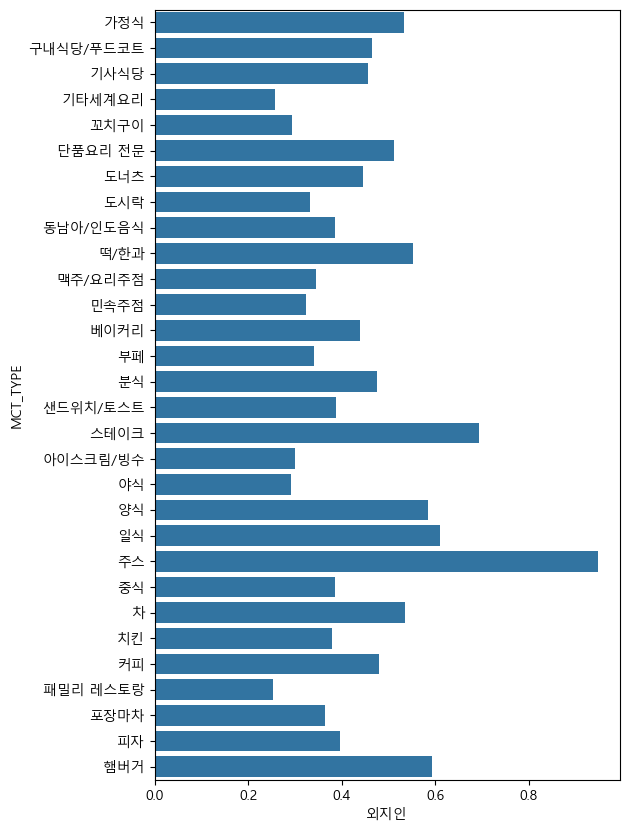

In [69]:
# 외지인 이용 비중
target_column = '외지인'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))  # 그래프 크기 설정
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
기타세계요리      0.252000
포장마차        0.250167
맥주/요리주점     0.243171
주스          0.238667
햄버거         0.223283
민속주점        0.214667
샌드위치/토스트    0.209074
아이스크림/빙수    0.199915
Name: RC_M12_AGE_UND_20_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_AGE_UND_20_CUS_CNT_RAT', ylabel='MCT_TYPE'>

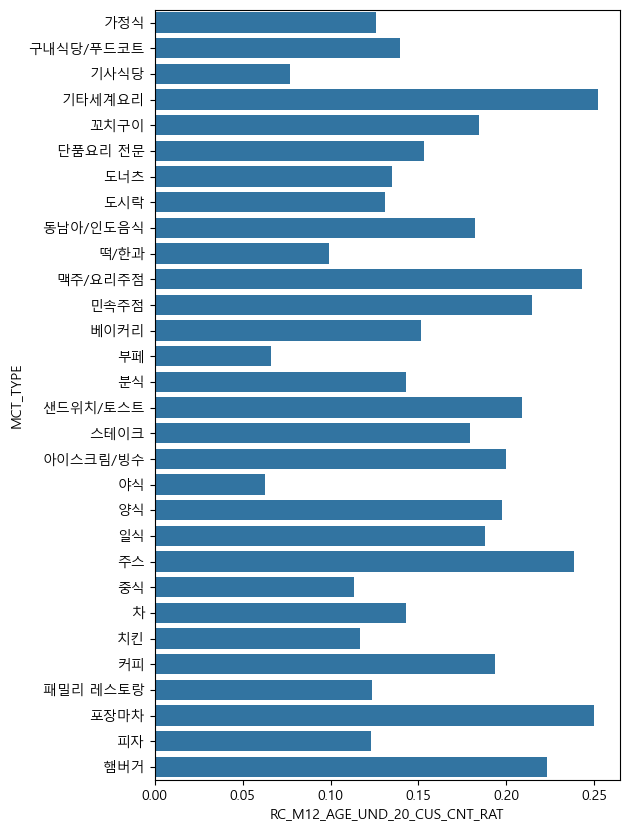

In [51]:
# 20대 이용 비중
target_column = 'RC_M12_AGE_UND_20_CUS_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
주스          0.392667
민속주점        0.342000
도너츠         0.326125
양식          0.312966
햄버거         0.307609
패밀리 레스토랑    0.302000
동남아/인도음식    0.294500
스테이크        0.292167
Name: RC_M12_AGE_30_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_AGE_30_CUS_CNT_RAT', ylabel='MCT_TYPE'>

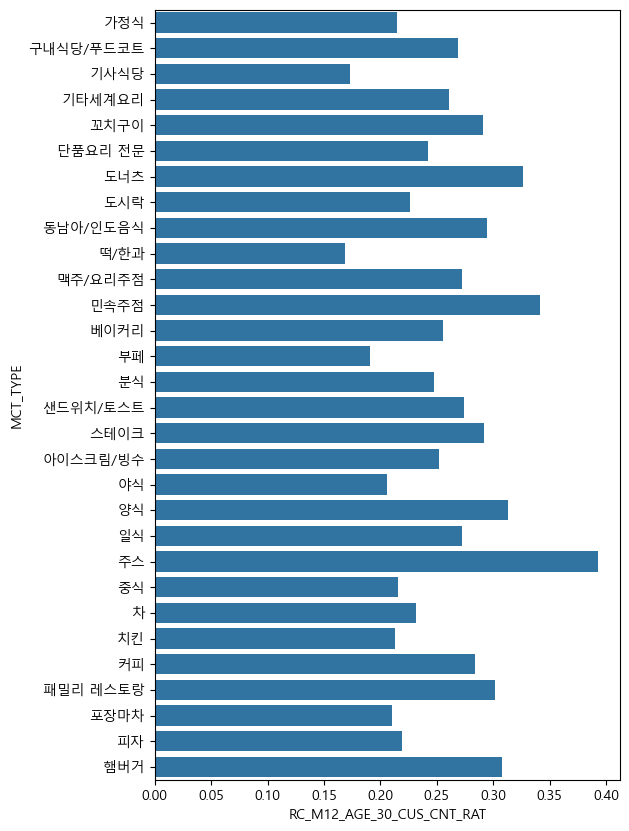

In [52]:
# 30대 이용 비중
target_column = 'RC_M12_AGE_30_CUS_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
도너츠         0.380625
패밀리 레스토랑    0.376333
기사식당        0.342333
야식          0.342000
치킨          0.333810
기타세계요리      0.331500
분식          0.324530
중식          0.322332
Name: RC_M12_AGE_40_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_AGE_40_CUS_CNT_RAT', ylabel='MCT_TYPE'>

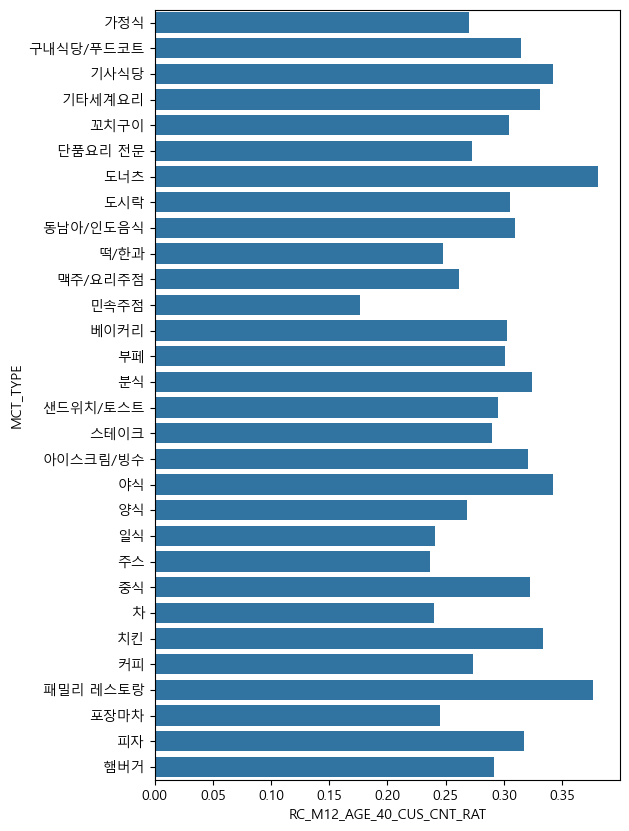

In [53]:
# 40대 이용 비중
target_column = 'RC_M12_AGE_40_CUS_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
부페      0.289000
떡/한과    0.271043
차       0.263900
도시락     0.263200
야식      0.260500
기사식당    0.255000
가정식     0.248167
치킨      0.248123
Name: RC_M12_AGE_50_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_AGE_50_CUS_CNT_RAT', ylabel='MCT_TYPE'>

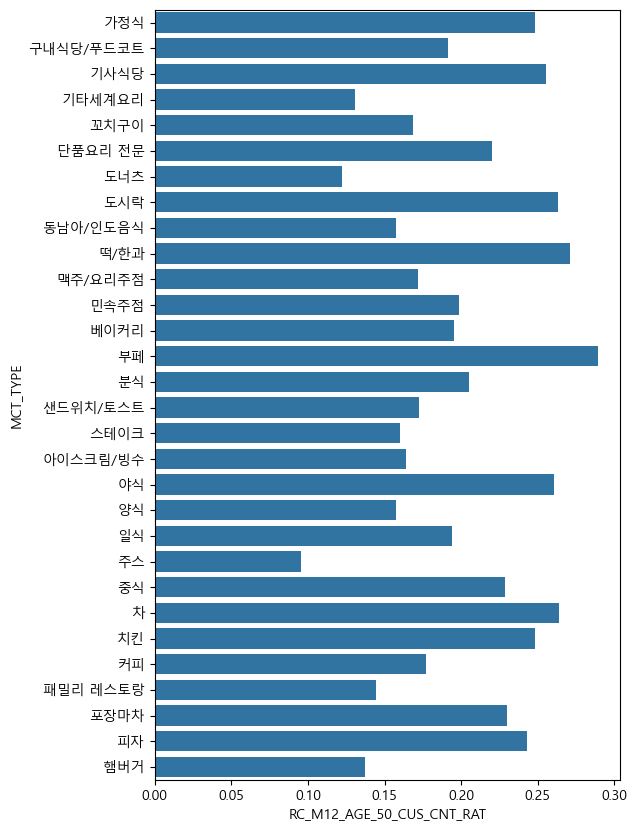

In [54]:
# 50대 이용 비중
target_column = 'RC_M12_AGE_50_CUS_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
떡/한과       0.213522
기사식당       0.153000
부페         0.152500
가정식        0.141285
야식         0.129000
차          0.122200
중식         0.120409
단품요리 전문    0.112118
Name: RC_M12_AGE_OVR_60_CUS_CNT_RAT, dtype: float64


<Axes: xlabel='RC_M12_AGE_OVR_60_CUS_CNT_RAT', ylabel='MCT_TYPE'>

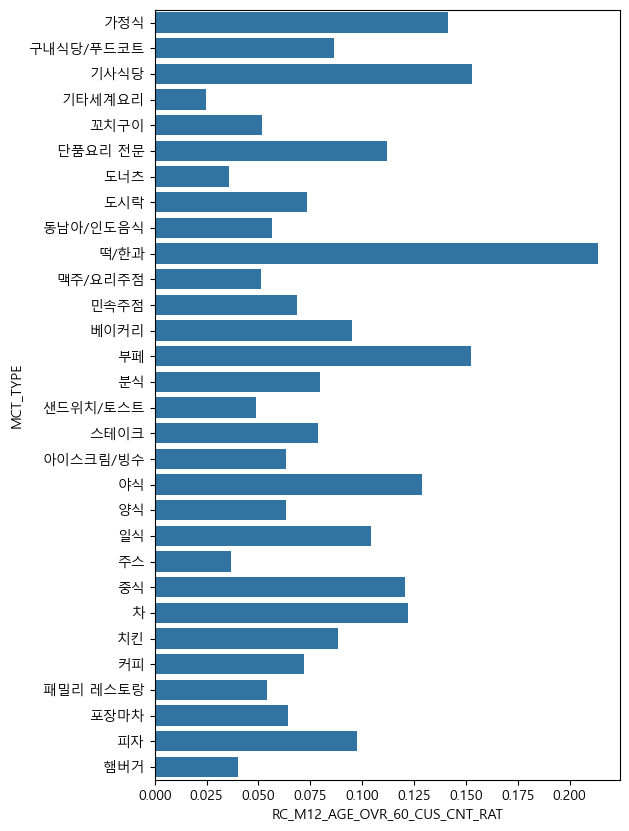

In [55]:
# 60대 이용 비중
target_column = 'RC_M12_AGE_OVR_60_CUS_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
도시락          0.176185
포장마차         0.162583
기사식당         0.161854
샌드위치/토스트     0.158367
동남아/인도음식     0.154595
패밀리 레스토랑     0.149430
주스           0.143345
구내식당/푸드코트    0.138464
Name: MON_UE_CNT_RAT, dtype: float64


<Axes: xlabel='MON_UE_CNT_RAT', ylabel='MCT_TYPE'>

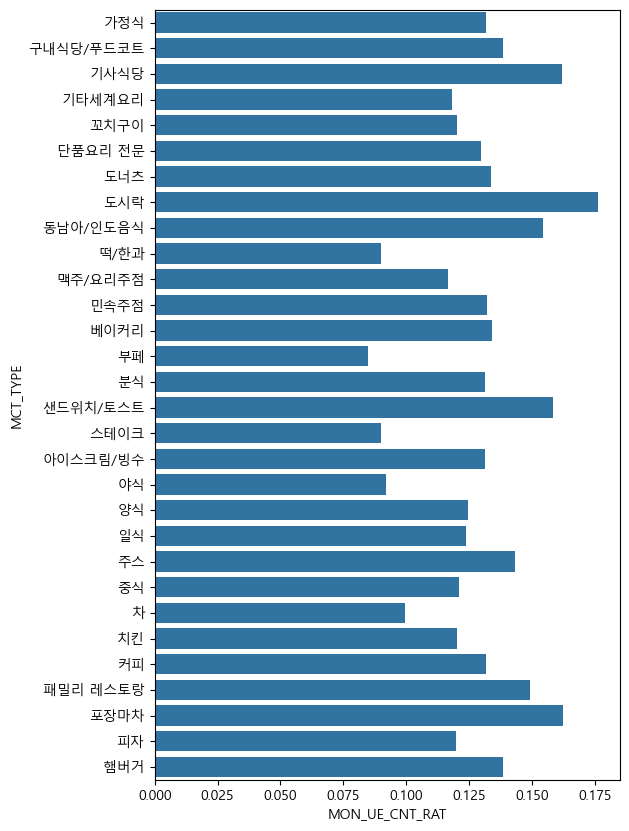

In [56]:
# 월요일 이용 비중
target_column = 'MON_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
포장마차         0.188504
민속주점         0.163731
기사식당         0.158696
도시락          0.152804
차            0.142991
기타세계요리       0.136835
구내식당/푸드코트    0.136576
가정식          0.135667
Name: TUE_UE_CNT_RAT, dtype: float64


<Axes: xlabel='TUE_UE_CNT_RAT', ylabel='MCT_TYPE'>

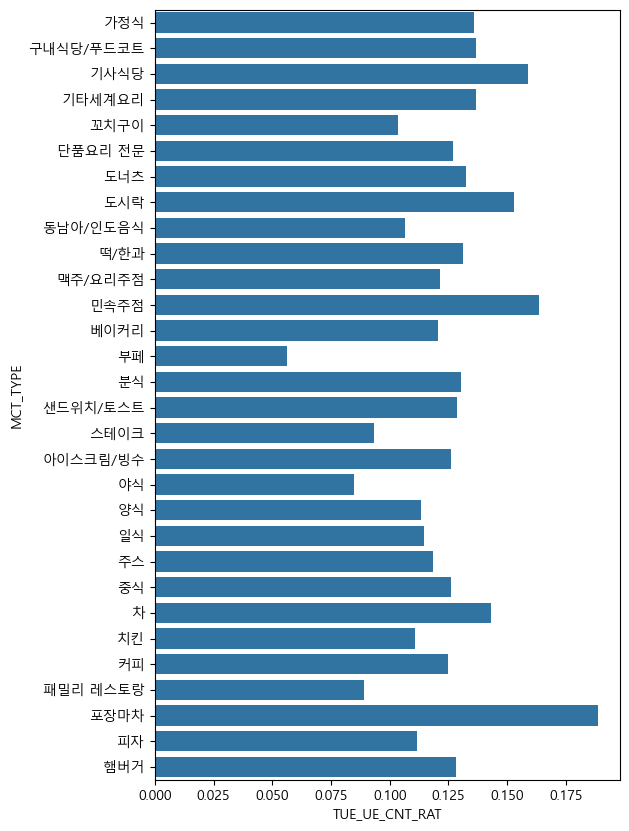

In [57]:
# 화요일 이용 비중
target_column = 'TUE_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
도시락          0.202028
야식           0.198166
구내식당/푸드코트    0.169528
떡/한과         0.161248
꼬치구이         0.154600
치킨           0.152603
차            0.148608
분식           0.147856
Name: THU_UE_CNT_RAT, dtype: float64


<Axes: xlabel='THU_UE_CNT_RAT', ylabel='MCT_TYPE'>

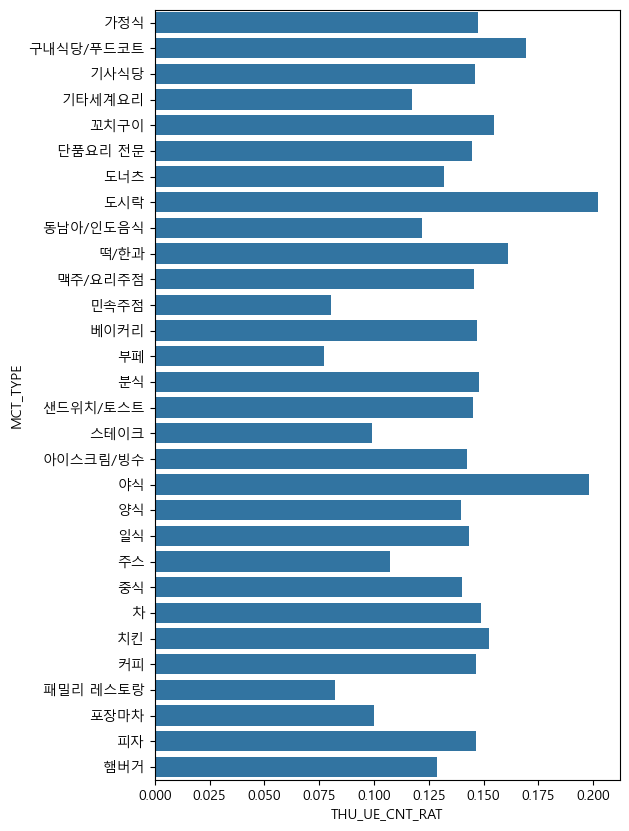

In [58]:
# 목요일 이용 비중
target_column = 'THU_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)

MCT_TYPE
민속주점         0.201750
구내식당/푸드코트    0.180786
맥주/요리주점      0.169307
차            0.169018
치킨           0.166634
꼬치구이         0.166627
일식           0.164390
단품요리 전문      0.158368
Name: FRI_UE_CNT_RAT, dtype: float64


<Axes: xlabel='FRI_UE_CNT_RAT', ylabel='MCT_TYPE'>

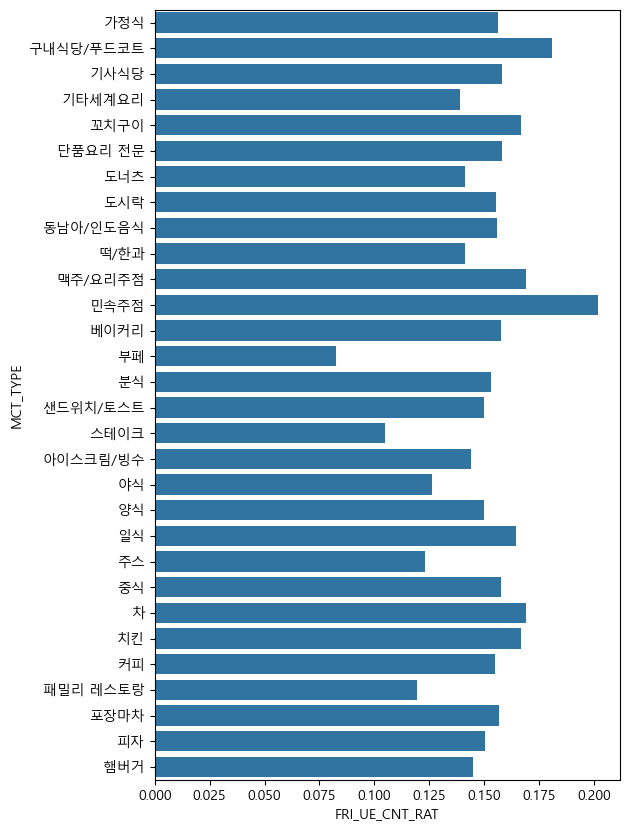

In [59]:
# 금요일 이용 비중
target_column = 'FRI_UE_CNT_RAT'
top_5_female_usage = grouped_df.sort_values(by=target_column, ascending=False).head(8)
print(top_5_female_usage[target_column])
plt.figure(figsize=(6, 10))
sns.barplot(x=target_column, y='MCT_TYPE', data=grouped_df)